# Rough & Random notes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Sample Scatter Plot with Regression Line

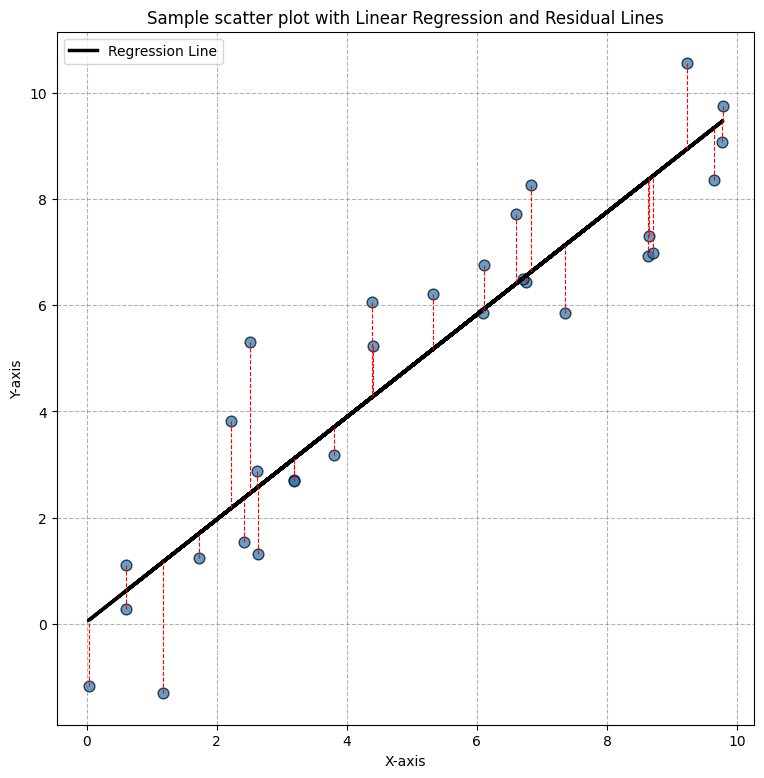

In [22]:
# Generate sample data
rng = np.random.default_rng(1234)
# 100 Uniformly distributed floats
x = rng.uniform(0, 10, size=30)
# Augment x by another normal distributed floats
y = x + rng.normal(size = 30)

# Initialize layout
fig, ax = plt.subplots(figsize=(9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with
# np.polyfit returns a slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Regression line
y_hat = a+b*x

# print(b, a)
# print(xseq)

# Plot regression
# xseq -> x coordinates, a+b*xseq -> y coordinate 
ax.plot(x, y_hat, color="k", lw=2.5, label="Regression Line");

for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y_hat[i]], 'r--', lw=0.8, label='_nolegend_')

ax.legend()
ax.set(
    xlabel="X-axis", 
    ylabel="Y-axis", 
    title="Sample scatter plot with Linear Regression and Residual Lines"
)
ax.grid(color='gray', linestyle='--', alpha=0.6);

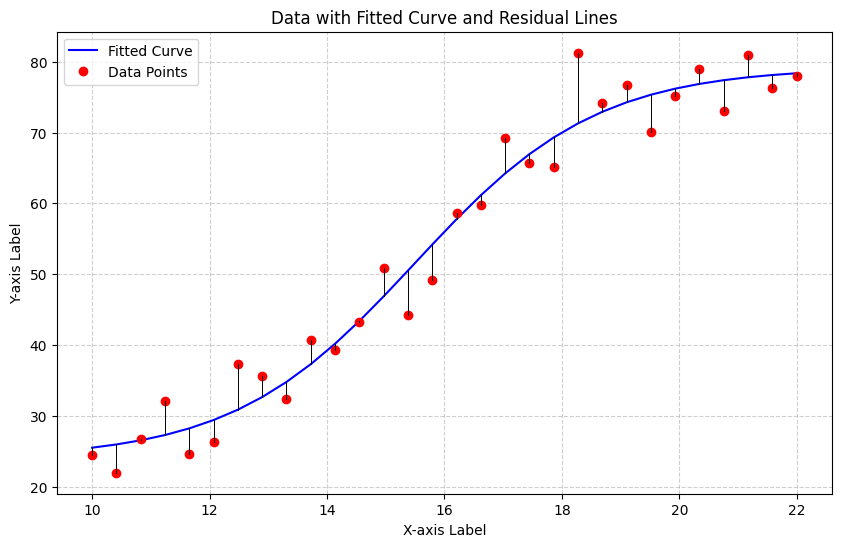

In [23]:
from scipy.optimize import curve_fit

# 1. Generate or load your data
# For demonstration, let's generate some sample data that follows a sigmoid pattern
np.random.seed(42)
x_data = np.linspace(10, 22, 30)
y_true = 20 + 60 / (1 + np.exp(-(x_data - 15) / 1.5))
y_data = y_true + np.random.normal(0, 5, len(x_data))

# Create a pandas DataFrame for easier handling (optional but recommended)
df = pd.DataFrame({'x': x_data, 'y': y_data})

# 2. Define the model function you want to fit (e.g., a sigmoid function)
def sigmoid(x, a, b, c, d):
    """Sigmoid function: a + b / (1 + exp(-(x - c) / d))"""
    return a + b / (1 + np.exp(-(x - c) / d))

# 3. Fit the model to your data using curve_fit from scipy.optimize
popt, pcov = curve_fit(sigmoid, df['x'], df['y'], p0=[20, 60, 15, 1.5])
y_fit = sigmoid(df['x'], *popt)

# 4. Create the Matplotlib plot
plt.figure(figsize=(10, 6))

# Plot the fitted curve
plt.plot(df['x'], y_fit, color='blue', label='Fitted Curve')

# Plot the actual data points
plt.plot(df['x'], df['y'], 'ro', label='Data Points')

# Plot the vertical lines connecting data points to the fitted curve
for i in range(len(df)):
    plt.plot([df['x'][i], df['x'][i]], [df['y'][i], y_fit[i]], 'k-', linewidth=0.7)

# Customize the plot
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Data with Fitted Curve and Residual Lines')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()